**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
#from sklearn.datasets import fetch_mldata 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.N=n_neighbors
        self.algorithm=algorithm
    
    def fit(self, X, y):
        self.X=X
        self.y=y
    
    def predict(self, X):
        if (self.algorithm=='brute'):
            y=np.zeros((X.shape[0]),dtype=int)
            dist=cdist(X,self.X,'minkowski')
            ind=dist.argsort(axis=1)[:,:self.N]
            
        elif(self.algorithm=='kd_tree'):
            kdt=KDTree(self.X,leaf_size=self.N)
            dist,ind=kdt.query(X,k=self.N)
        
        a=np.take(self.y,ind,axis=0)
        c=np.unique(a)
        r=(a[:,:,np.newaxis]==c).sum(axis=1).argmax(axis=1)
        return r

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)

assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 993 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 4.98 ms


array([2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0])

In [11]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 65.4 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 32.9 ms


array([0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2])

In [17]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2], dtype=int64)

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',
                                remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

### Вопрос: 
Пыталась подбирать гиперпараметры, качество получилось хуже, чем на CountVectorizer() без подобранных параметров (потому что перебор получился на нерепрезентативной выборке?)

In [90]:
# pipe_clf = Pipeline([('vect', CountVectorizer()),
#                    ('clf', KNeighborsClassifier())])

# param_grid = {
#    'vect__max_df': np.linspace(0.1, 1.0, 5,endpoint=True),
#    'vect__min_df':np.linspace(0.1, 1.0, 5,endpoint=True),
#    'vect__ngram_range': ((1, 1), (1, 2)),
# }

In [163]:
#grid_clf=GridSearchCV(pipe_clf,
#                      param_grid,
#                      n_jobs=-1,
#                      return_train_score=True
#                      )
# grid_clf.fit(data[:6000], target[:6000])

In [92]:
# grid_clf.best_score_

0.1313333333333333

In [93]:
# grid_clf.best_params_

{'vect__max_df': 0.775, 'vect__min_df': 0.1, 'vect__ngram_range': (1, 2)}

### Вопрос: 
Правильно ли считать n_neighbors отдельно от других гиперпарамеров? Или можно было спокойно в параметры grid_search положить и посмотреть качество модели (затратив много времени на это)? 

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [23]:
#count_vect=CountVectorizer(max_df = 0.775, 
#                          min_df = 0.1,
#                          ngram_range = (1, 2))
count_vect = CountVectorizer()
X = count_vect.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
kfold = KFold(3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
%%time
neigh=np.arange(1,11)
mean_ac=np.array([])
for n in neigh:
    classif = KNeighborsClassifier(n_neighbors = n)
    accur = np.array([])
    for train,test in kfold.split(X):
        classif.fit(X[train], target[train])
        clas_pred = classif.predict(X[test])
        accur = np.append(accur,accuracy_score(target[test], clas_pred))
    mean_ac = np.append(mean_ac,np.mean(accur))

Wall time: 1min 34s


In [26]:
def draw(neigh,mean_ac,num):
    plt.xticks(range(1,num))
    plt.plot(neigh,mean_ac)
    plt.xlabel("n_neighbours")
    plt.ylabel("Accuracy")
    print(mean_ac[mean_ac.argmax()], mean_ac.argmax() + 1)

0.20647001980379184 1


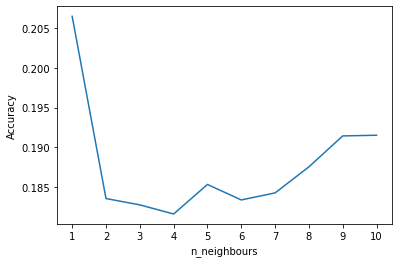

In [27]:
draw(neigh, mean_ac, 11)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [28]:
tfid_vect=TfidfVectorizer()
X_tfid_train=tfid_vect.fit_transform(data)

In [29]:
%%time
neigh=np.array(range(1,11))
mean_ac = np.array([])
for n in neigh:
    class_tf = KNeighborsClassifier(n_neighbors = n,metric = 'cosine')
    accur = np.array([])
    for train, test in kfold.split(X_tfid_train):
        class_tf.fit(X_tfid_train[train], target[train])
        clas_pred = class_tf.predict(X_tfid_train[test])
        accur = np.append(accur, accuracy_score(target[test], clas_pred))
    mean_ac = np.append(mean_ac, np.mean(accur))

Wall time: 1min 58s


0.5958995830489591 1


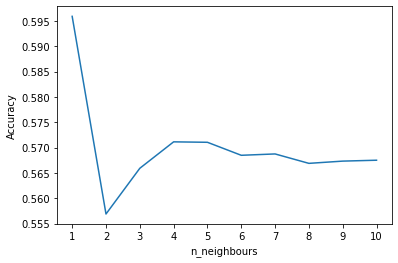

In [30]:
draw(neigh, mean_ac, 11)

### Ответ:
Качество на второй модели лучше, так как косинусная метрика лучше работает с разреженными векторами, а tfidf подход решает проблему часто встречающихся в больших документах слов

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [32]:
data_new = newsgroups['data']
target_new = newsgroups['target']

In [33]:
classif_best = KNeighborsClassifier(n_neighbors=1, metric='cosine')
classif_best.fit(X_tfid_train, target)

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [34]:
X_tfid_test = tfid_vect.transform(data_new)
pred = classif_best.predict(X_tfid_test)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [35]:
accuracy_score(target_new, pred)

0.5088953797132236

### Ответ:
Из-за того, что vectorizer.transform(...) лишь приводит к нужному виду и не учитывает признаки-слова, не встретившиеся на трейне, точность модель упала